In [4]:
import json

db = json.load(open('code/pydata-book/datasets/usda_food/database.json'))

len(db)

6636

In [5]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
from pandas import DataFrame, Series
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [7]:
info_keys=['id', 'description', 'manufacturer', 'group']
info = DataFrame(db, columns=info_keys)
info[:5]

,id,description,manufacturer,group
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products


In [8]:
import pandas as pd

pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [10]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [11]:
nutrients.duplicated().sum()

14179

In [12]:
nutrients.drop_duplicates()

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [13]:
col_mapping = {
    'description': 'food',
    'group': 'fgroup'
}

info = info.rename(columns=col_mapping, copy=False)
info

,id,food,manufacturer,fgroup
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products
5,1029,"Cheese, mozzarella, part skim milk, low moisture",,Dairy and Egg Products
6,1038,"Cheese, romano",,Dairy and Egg Products
7,1039,"Cheese, roquefort",,Dairy and Egg Products
8,1048,"Cheese spread, pasteurized process, american, ...",,Dairy and Egg Products
9,1049,"Cream, fluid, half and half",,Dairy and Egg Products


In [14]:
col_mapping2 = {
    'description': 'nutrients',
    'group': 'nutgroup'
}

nutrients = nutrients.rename(columns=col_mapping2, copy=False)
nutrients

,nutrients,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [15]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

,nutrients,nutgroup,units,value,id,food,manufacturer,fgroup
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",,Dairy and Egg Products
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",,Dairy and Egg Products
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",,Dairy and Egg Products
3,Ash,Other,g,3.280,1008,"Cheese, caraway",,Dairy and Egg Products
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",,Dairy and Egg Products
5,Water,Composition,g,39.280,1008,"Cheese, caraway",,Dairy and Egg Products
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",,Dairy and Egg Products
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",,Dairy and Egg Products
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",,Dairy and Egg Products
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",,Dairy and Egg Products


In [16]:
ndata.ioc[30000]

/Users/lirawx/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


nutrients                                          Vitamin A, RAE
nutgroup                                                 Vitamins
units                                                     mcg_RAE
value                                                         473
id                                                           3950
food            Infant formula, ABBOTT NUTRITION, SIMILAC, ADV...
manufacturer                                                 None
fgroup                                                 Baby Foods
Name: 30000, dtype: object

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

result = ndata.groupby(['nutrients', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

AttributeError: 'Series' object has no attribute 'order'

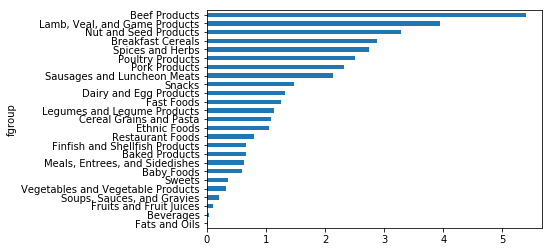

In [18]:
result = ndata.groupby(['nutrients', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [19]:
by_nutrients = ndata.groupby(['nutgroup', 'nutrients'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrients.apply(get_maximum)[['value', 'food']]

max_foods.food = max_foods.food.str[:50]

max_foods.ix['Amino Acids']['food']

/Users/lirawx/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


nutrients
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate,

In [26]:
max_foods.loc['Amino Acids']['food']

nutrients
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate,